In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_D37.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [12]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
1389,Gd,TA,131000
848,Gd,Fa,240000
1264,NaN,TA,181000
143,NaN,TA,204000
870,NaN,TA,109500


In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'No of houses')

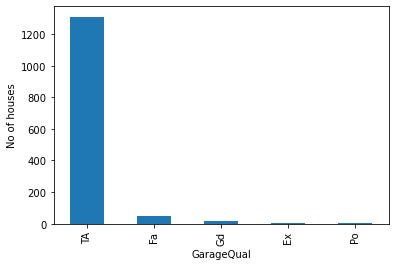

In [4]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('No of houses')

<AxesSubplot:>

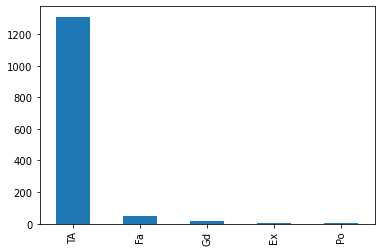

In [14]:
df['GarageQual'].value_counts().plot.bar()

In [15]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

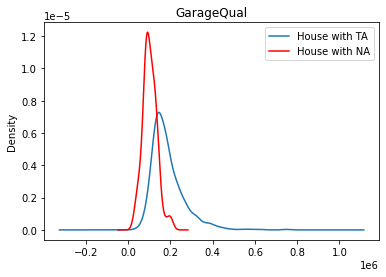

In [18]:
fig = plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,lable=ax.get_legend_handles_labels()
labels=['House with TA','House with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [19]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [20]:
df["GarageQual"].fillna('TA',inplace=True)

In [21]:
df['GarageQual'].value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:>

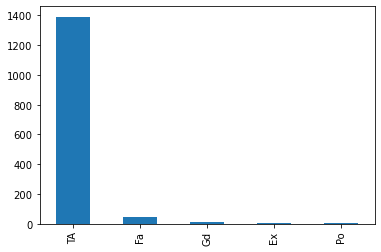

In [22]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

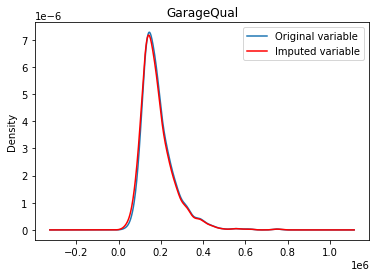

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<AxesSubplot:>

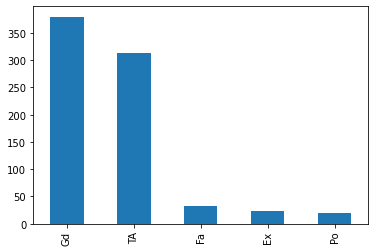

In [25]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [26]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

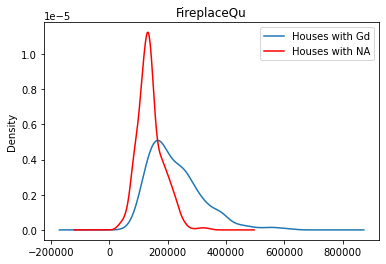

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [28]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [29]:
df['FireplaceQu'].fillna('Gd', inplace=True)

In [32]:
df['FireplaceQu'].value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

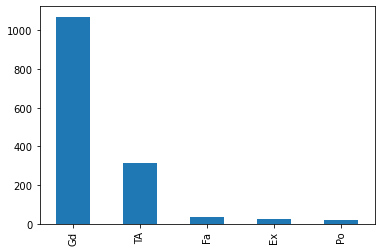

In [31]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

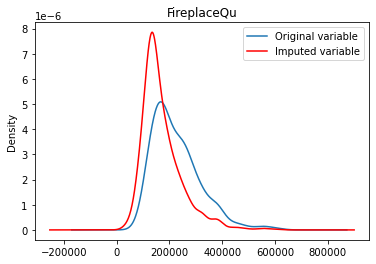

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')
#it not giving good result

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)


In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy='most_frequent')

In [41]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [42]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)